In [1]:
import requests
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets

In [2]:
if not os.path.isfile('../data/mp_characteristics_V2_19492021.tab'):
    print('Downloading mp_characteristics dataset...')
    with open('../data/mp_characteristics_V2_19492021.tab', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402444', stream=True).content
        out_file.write(content)
if not os.path.isfile('../data/vote_characteristics_V2_19492021.tab'):
    print('Downloading vote_characteristics dataset...')
    with open('../data/vote_characteristics_V2_19492021.tab', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402442', stream=True).content
        out_file.write(content)
if not os.path.isfile('../data/voting_behavior_V2_19492021.dta'):
    print('Downloading voting_behavior dataset...')
    with open('../data/voting_behavior_V2_19492021.dta', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402445', stream=True).content
        out_file.write(content)

mp_char = pd.read_csv('../data/mp_characteristics_V2_19492021.tab', sep='\t')
vote_char = pd.read_csv('../data/vote_characteristics_V2_19492021.tab', sep='\t')
voting_beh = pd.read_stata('../data/voting_behavior_V2_19492021.dta')

# Create profile reports

In [ ]:
from ydata_profiling import ProfileReport # pip install ydata-profiling
mp_char_report = ProfileReport(mp_char)
mp_char_report.to_file('../data/reports/mp_char.html')
vote_char_report = ProfileReport(vote_char)
vote_char_report.to_file('../data/reports/vote_char.html')
voting_beh_report = ProfileReport(voting_beh)
voting_beh_report.to_file('../data/reports/voting_beh.html')

# Inspect dataset samples

In [6]:
mp_char.sample(5)

,id_de_parliament,lastname,firstname,elecper,gender,year_birth,date_birth,date_birth_text,mandate_start,mandate_end,...,whip,partyid_cmp,partyid_ches,partyid_bl,partyid_parlgov,partyid_parlgov2,id_de_parliament_string,mp_id_old,pers_id_pdbd,id_de_manow
9475,11002716.0,Lamers,Karl A.,19,1,1951,1951-02-12,12/02/1951,2017-10-24,2021-10-26,...,0,41521.0,301.0,NaN,1727.0,808.0,11002716,NaN,DE_Lamers_Karl_1951,132301
2657,11001337.0,Leuze,Eduard,1,1,1906,1906-12-24,24/12/1906,1952-03-21,1953-09-07,...,0,41420.0,NaN,NaN,543.0,358.0,11001337,5747.0,DE_Leuze_Eduard_1906,5747
5983,11002155.0,Seiler-Albring,Ursula,11,0,1943,1943-07-19,19/07/1943,1987-02-18,1990-12-20,...,1,41420.0,NaN,NaN,543.0,NaN,11002155,80256.0,DE_Seiler_Ursula_1943,80256
5043,11002364.0,Veit,Hermann,1,1,1897,1897-04-13,13/04/1897,1949-09-07,1953-09-07,...,0,41320.0,NaN,NaN,558.0,NaN,11002364,11167.0,DE_Veit_Hermann_1897,11167
6317,11003781.0,Jung,Franz Josef,17,1,1949,1949-03-05,05/03/1949,2009-10-27,2013-10-27,...,0,41521.0,301.0,NaN,1727.0,808.0,11003781,81462.0,DE_Jung_Franz_1949,81462


In [4]:
vote_char.sample(5)

,vote_id,vote_id2,vote_id_elecper,elecper,source,vote_title,vote_type,vote_finalpassage,vote_numproposals,policy1,...,gesta,cabid_parlgov,cabid_erdda,cabinet,cab_start,cab_end,elecper_start,elecper_end,cab_parties,vote_date
0,1001,1001.0,1,1,01/069/2520,Entwurf eines Gesetzes ��ber den Beitritt der ...,10.0,1,0,19,...,NaN,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1950-06-15
1,1002,1002.0,2,1,01/076/2738,Handschriftlicher ��nderungsantrag der Abgeord...,5.0,0,0,12,...,NaN,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1950-07-14
2,1003,1003.0,3,1,01/079/2923,Artikel I Ziffer 2 des Entwurfs eines Gesetzes...,10.0,0,0,1,...,NaN,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1950-07-26
3,1004,1004.0,4,1,01/150/5989,Antrag der Fraktion der Deutschen Partei betre...,1.0,0,0,20,...,NaN,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1951-06-08
4,1005,1005.0,5,1,01/183/7787,Artikel I des Entwurfs eines Gesetzes betreffe...,10.0,0,0,18,...,NaN,147.0,601.0,Adenauer I,1949-09-15,1953-09-06,1949-08-14,1953-09-06,"CDU/CSU, FDP, DP",1952-01-10


In [5]:
voting_beh.sample(5)

,id_de_parliament,lastname,firstname,party_det,ppg,party_text,elecper,office_spell,vote_id,vote_date,vote_beh,vote_deviate,mp_id_old,pers_id_pdbd,id_de_manow
0,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,11,1.0,11106.0,1988-11-25,no,no deviation,10.0,DE_Abelein_Manfred_1930,10
1,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,8,1.0,8028.0,1978-02-16,no,no deviation,10.0,DE_Abelein_Manfred_1930,10
2,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,9,1.0,9002.0,1981-03-18,no,no deviation,10.0,DE_Abelein_Manfred_1930,10
3,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,10,1.0,10051.0,1985-06-21,no,no deviation,10.0,DE_Abelein_Manfred_1930,10
4,11000001.0,Abelein,Manfred,CDU (Christian Democratic Union),CDU/CSU,CDU,11,1.0,11194.0,1990-04-26,unexcused absent,unexcused absent,10.0,DE_Abelein_Manfred_1930,10


# Voting behavior analysis

For the classification we only need the "Voting behavior" table. In the following, we will therefore analyse the values of that table that are used in the classification in detail.

### Reduce dataset

In [114]:
# including votes only from the last election period
reduced = voting_beh.loc[voting_beh['vote_date'] > '2017-10-24']

# reducing columns (specify columns to keep)
reduced = reduced[['id_de_parliament', 'party_text', 'vote_id', 'vote_beh']]

# convert voting behavior from categorial value to string
reduced['vote_beh'] = reduced['vote_beh'].astype(str)

display(reduced)

,id_de_parliament,party_text,vote_id,vote_beh
320229,11001938.0,CDU,19022.0,yes
320230,11001938.0,CDU,19232.0,yes
320234,11001938.0,CDU,19146.0,no
320237,11001938.0,CDU,19177.0,yes
320251,11001938.0,CDU,19065.0,unexcused absent
...,...,...,...,...
1435244,11004971.0,AfD,19242.0,yes
1435245,11004971.0,AfD,19243.0,no
1435246,11004972.0,Linke,19243.0,no
1435247,11004972.0,Linke,19242.0,no


## Distribution of parties

Number of seats per party: (see https://de.wikipedia.org/wiki/Bundestagswahl_2017)

In [115]:
party_seats = pd.DataFrame({'seats': [200, 153, 94, 80, 69, 67, 46, 0]}, 
                           index=['CDU', 'SPD', 'AfD', 'FDP', 'Linke', 'GRÜNE', 'CSU', ''])
party_seats['share'] = party_seats['seats'] / party_seats['seats'].sum()
party_seats

,seats,share
CDU,200,0.282087
SPD,153,0.215797
AfD,94,0.132581
FDP,80,0.112835
Linke,69,0.097320
GRÜNE,67,0.094499
CSU,46,0.064880
,0,0.000000


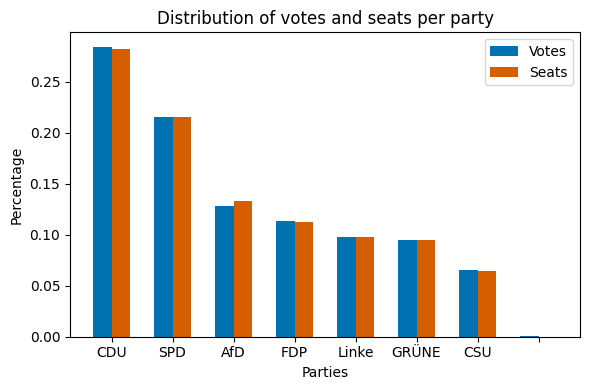

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# calculate value counts
valcounts = reduced['party_text'].value_counts(normalize=True)

# Get x positions for the left bars
x_positions = np.arange(len(valcounts))
width = 0.3

# plot bars for value counts
ax.bar(x_positions, valcounts, color='#0072B2', width=0.3, label='Votes')

# plot bars for party seats
ax.bar(x_positions+width, party_seats['share'], color='#D55E00', width=0.3, label='Seats')

ax.set_title('Distribution of votes and seats per party')
ax.set_xlabel('Parties')
ax.set_ylabel('Percentage')
ax.legend()

# Set x-axis ticks and labels
ax.set_xticks(x_positions+0.5*width)
ax.set_xticklabels(valcounts.index)

plt.tight_layout()

# save plot as pdf and show
plt.savefig('../data/graphics/party_distribution.pdf', format='pdf', bbox_inches="tight")
plt.show()

There are four MPs that have no party assigned:

In [117]:
# MPs that have no party assigned
mp_char[mp_char['id_de_parliament'].isin([11004388., 11004191., 11004174., 11004295.])][['id_de_parliament','lastname','firstname']].drop_duplicates()

,id_de_parliament,lastname,firstname
11154,11004388.0,Rohde,Dennis
11812,11004191.0,Ziegler,Dagmar
11954,11004174.0,Tauber,Peter
12445,11004295.0,Heidenblut,Dirk


We see that four MPs have no party assigned, but they should have when we look at the [list of members of the 19th Bundestag](https://en.wikipedia.org/wiki/List_of_members_of_the_19th_Bundestag):

| Name | Party |
| --- | --- |
| Dennis Rohde | SPD |
| Dagmar Ziegler | SPD |
| Dirk Heidenblut | SPD |
| Peter Tauber | CDU |

Those missing values need to be added in the preprocessing:

In [118]:
reduced_fixed = reduced.copy()
reduced_fixed.loc[reduced_fixed['id_de_parliament'].isin([11004388., 11004191., 11004295.]), 'party_text'] = 'SPD'
reduced_fixed.loc[reduced_fixed['id_de_parliament'] == 11004174., 'party_text'] = 'CDU'

## Distribution of voting behavior

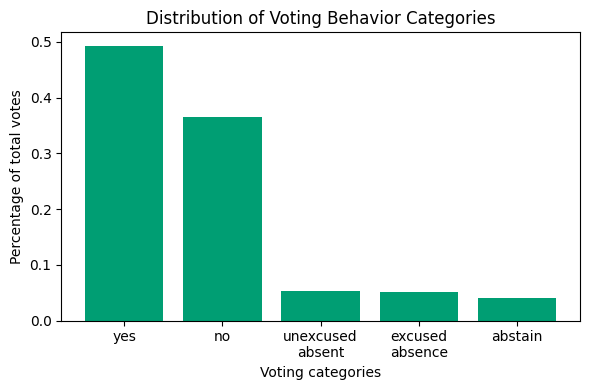

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# calculate value counts
valcounts = reduced['vote_beh'].value_counts(normalize=True)

# make longer category labels multi-line
valcounts.index = valcounts.index.str.replace('unexcused absent', 'unexcused\nabsent').str.replace('excused absence', 'excused\nabsence')

ax.bar(valcounts.index, valcounts, color='#009E73')
ax.set_title('Distribution of Voting Behavior Categories')
ax.set_xlabel('Voting categories')
ax.set_ylabel('Percentage of total votes')

plt.tight_layout()

# save plot as pdf and show
plt.savefig('../data/graphics/voting_behavior_distribution.pdf', format='pdf', bbox_inches="tight")
plt.show()

## Transform dataset

In [141]:
transformed = reduced_fixed.copy()

# set the datatype of the ID from float to int (int64)
transformed[['id_de_parliament']] = transformed[['id_de_parliament']].astype(int)
transformed[['vote_id']] = transformed[['vote_id']].astype(int)

# pivots the dataset so that there is only one sample for each MP with attributes for each vote holding the respective voting behaviour
transformed = transformed.pivot(index=['id_de_parliament', 'party_text'], columns=['vote_id'], values=['vote_beh'])

# reset the index to be able to access data as usually
transformed = transformed.reset_index()

# remove mp_id (not necessary for classification)
transformed = transformed.drop('id_de_parliament', axis=1)

# make column index flat / non-hierarchical and format name
transformed.columns = transformed.columns.to_flat_index()
transformed.columns = transformed.columns.map(lambda x: str(x).replace('(', ''))
transformed.columns = transformed.columns.map(lambda x: str(x).replace('\'', ''))
transformed.columns = transformed.columns.map(lambda x: str(x).replace(', )', ''))
transformed.columns = transformed.columns.map(lambda x: str(x).replace('beh, ', ''))
transformed.columns = transformed.columns.map(lambda x: str(x).replace(')', ''))

display(transformed)

C:\Users\mogra\AppData\Local\Temp\ipykernel_23336\3790398982.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  transformed = transformed.drop('id_de_parliament', axis=1)


,party_text,vote_19001,vote_19002,vote_19003,vote_19004,vote_19005,vote_19006,vote_19007,vote_19008,vote_19009,...,vote_19235,vote_19236,vote_19237,vote_19238,vote_19239,vote_19240,vote_19241,vote_19242,vote_19243,vote_19244
0,CDU,yes,yes,yes,yes,yes,yes,yes,yes,no,...,yes,yes,yes,yes,yes,yes,no,yes,yes,yes
1,SPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,yes,yes,yes,yes,yes,yes,no,excused absence,excused absence,unexcused absent
2,Linke,no,no,no,no,no,no,no,no,yes,...,no,no,no,no,no,no,no,abstain,no,no
3,CDU,yes,yes,yes,yes,yes,yes,yes,yes,no,...,yes,yes,yes,yes,yes,yes,no,yes,yes,excused absence
4,Linke,excused absence,excused absence,excused absence,excused absence,excused absence,unexcused absent,unexcused absent,unexcused absent,excused absence,...,no,no,no,no,no,no,no,abstain,no,excused absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,FDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,yes,yes,no,no,yes,no,no
741,GRÜNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,yes,no,no,yes,yes,yes,no,yes,no,no
742,CDU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,yes
743,AfD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,no,no


# Analyse NaNs

In [142]:
# Total number of NaNs
print("Total number of possible votes:", transformed.shape[0]*(transformed.shape[1]-1))
print("Total number of NaNs:", transformed.isna().sum().sum())
print("Total fraction of NaNs", (transformed.isna().sum().sum())/(transformed.shape[0]*(transformed.shape[1]-1)))

Total number of possible votes: 181780
Total number of NaNs: 10026
Total fraction of NaNs 0.05515458246231709


About 5% of all values are NaNs.

Number NaNs per party:

In [171]:
# Calculate number of NaNs per party
transformed_isna = transformed[transformed.columns[1:]].isna()
transformed_isna = pd.concat([transformed['party_text'],transformed_isna], axis=1)
transformed_nan = transformed_isna.groupby('party_text', as_index=False).sum()
transformed_nan['party_sum'] = transformed_nan[transformed.columns[1:]].sum(axis=1)
transformed_nan

,party_text,vote_19001,vote_19002,vote_19003,vote_19004,vote_19005,vote_19006,vote_19007,vote_19008,vote_19009,...,vote_19236,vote_19237,vote_19238,vote_19239,vote_19240,vote_19241,vote_19242,vote_19243,vote_19244,party_sum
0,AfD,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,749
1,CDU,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,2932
2,CSU,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,771
3,FDP,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1226
4,GRÜNE,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1220
5,Linke,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,488
6,SPD,10,10,10,10,10,10,10,10,10,...,11,11,11,11,11,11,11,11,11,2640


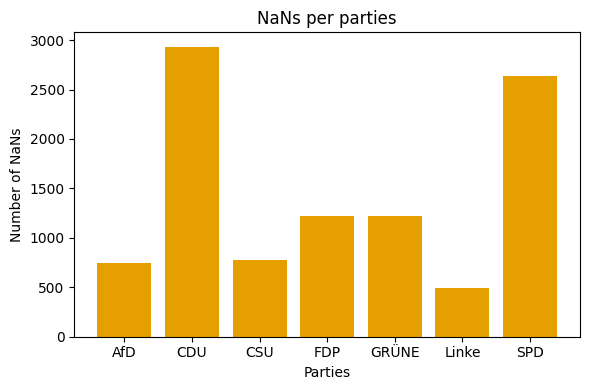

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.bar(transformed_nan['party_text'], transformed_nan['party_sum'], color='#E69F00')
ax.set_title('NaNs per parties')
ax.set_xlabel('Parties')
ax.set_ylabel('Number of NaNs')

plt.tight_layout()
plt.show()

Number of NaNs in relation to the party size.

In [173]:
# Calculate number of NaNs per party in relation to their party size, so the average number of NaNs per MP for each party.
transformed_isna = transformed[transformed.columns[1:]].isna()
transformed_isna = pd.concat([transformed['party_text'],transformed_isna], axis=1)
transformed_isna['party_size'] = 1
transformed_nan_rel = transformed_isna.groupby('party_text', as_index=False).sum()
transformed_nan_rel['party_rel'] = transformed_nan_rel[transformed.columns[1:-1]].sum(axis=1) / (transformed_nan_rel['party_size'])
transformed_nan_rel

,party_text,vote_19001,vote_19002,vote_19003,vote_19004,vote_19005,vote_19006,vote_19007,vote_19008,vote_19009,...,vote_19237,vote_19238,vote_19239,vote_19240,vote_19241,vote_19242,vote_19243,vote_19244,party_size,party_rel
0,AfD,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,93,8.000000
1,CDU,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,212,13.773585
2,CSU,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,49,15.653061
3,FDP,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,85,14.364706
4,GRÜNE,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,72,16.875000
5,Linke,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,71,6.845070
6,SPD,10,10,10,10,10,10,10,10,10,...,11,11,11,11,11,11,11,11,163,16.128834


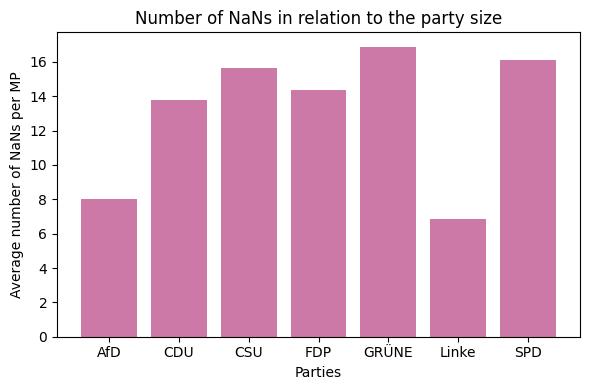

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.bar(transformed_nan_rel['party_text'], transformed_nan_rel['party_rel'], color='#CC79A7')
ax.set_title('Number of NaNs in relation to the party size')
ax.set_xlabel('Parties')
ax.set_ylabel('Average number of NaNs per MP')

plt.tight_layout()

# save plot as pdf and show
plt.savefig('../data/graphics/nan_rel_party.pdf', format='pdf', bbox_inches="tight")
plt.show()

# Archive

## Plot distribution of voting behaviour categories

[Text(0, 0, 'yes'),
 Text(1, 0, 'no'),
 Text(2, 0, 'excused absence'),
 Text(3, 0, 'unexcused absent'),
 Text(4, 0, 'abstain'),
 Text(5, 0, 'voting behavior not/wrongly protocolled'),
 Text(6, 0, 'invalid vote')]

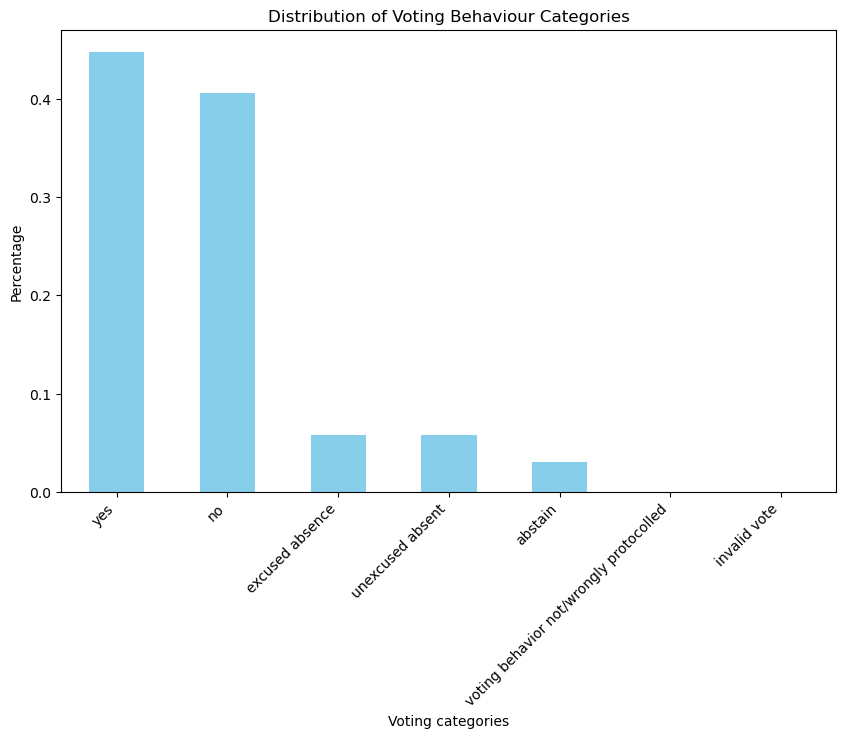

In [12]:
plt.figure(figsize=(10, 6))
ax = voting_beh['vote_beh'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
ax.set_title('Distribution of Voting Behaviour Categories')
ax.set_xlabel('Voting categories')
ax.set_ylabel('Percentage')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

## Plot distribution of parties

[Text(0, 0, 'SPD'),
 Text(1, 0, 'CDU'),
 Text(2, 0, 'FDP'),
 Text(3, 0, 'CSU'),
 Text(4, 0, 'Linke'),
 Text(5, 0, 'GRÜNE'),
 Text(6, 0, 'CDU '),
 Text(7, 0, 'B90/GR'),
 Text(8, 0, 'AfD'),
 Text(9, 0, 'Grüne'),
 Text(10, 0, 'Linke/PDS'),
 Text(11, 0, 'DP'),
 Text(12, 0, 'GB/BHE'),
 Text(13, 0, 'FU'),
 Text(14, 0, 'KPD'),
 Text(15, 0, 'DA/FVP'),
 Text(16, 0, 'WAV'),
 Text(17, 0, ''),
 Text(18, 0, 'BP'),
 Text(19, 0, 'BHE/DG'),
 Text(20, 0, 'ZENTRUM'),
 Text(21, 0, 'DRP')]

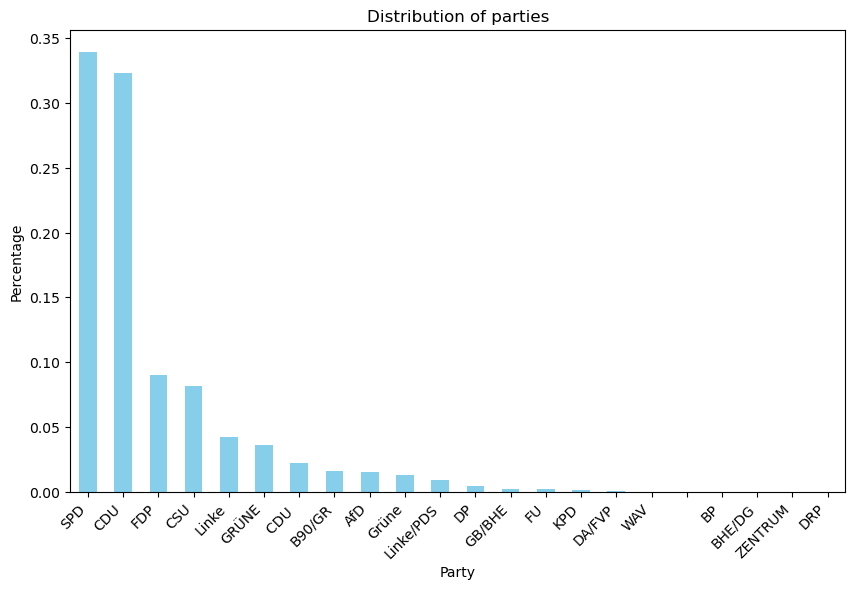

In [13]:
plt.figure(figsize=(10, 6))
ax = voting_beh['party_text'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
ax.set_title('Distribution of parties')
ax.set_xlabel('Party')
ax.set_ylabel('Percentage')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

## Merge and look for correlations

In [17]:
# merging voting_beh and mp_char as btvote
btvote = pd.merge(voting_beh, mp_char, on=['id_de_parliament', 'elecper', 'office_spell'], how='left', suffixes=['_DROP',''])

# merging vote_char and btvote
btvote = pd.merge(btvote, vote_char, on=['vote_id'], suffixes=['_DROP',''])

# droping duplicate columns
btvote.drop(btvote.filter(regex='_DROP$').columns, axis=1, inplace=True)

btvote.head()

,id_de_parliament,party_det,ppg,party_text,office_spell,vote_id,vote_beh,vote_deviate,lastname,firstname,...,gesta,cabid_parlgov,cabid_erdda,cabinet,cab_start,cab_end,elecper_start,elecper_end,cab_parties,vote_date
0,11000001.0,CDU (Christian Democratic Union),CDU/CSU,CDU,1.0,11106.0,no,no deviation,Abelein,Manfred,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
1,11000017.0,SPD (Social Democratic Party of Germany),SPD,SPD,1.0,11106.0,abstain,weak deviation,Ahrens,Karl,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
2,11000043.0,SPD (Social Democratic Party of Germany),SPD,SPD,2.0,11106.0,abstain,weak deviation,Apel,Hans,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
3,11000089.0,FDP (Free Democratic Party),FDP,FDP,1.0,11106.0,excused absence,excused absence,Bangemann,Martin,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
4,11000111.0,FDP (Free Democratic Party),FDP,FDP,1.0,11106.0,no,no deviation,Baum,Gerhart Rudolf,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25


In [ ]:
import seaborn as sns
df = pd.merge(btvote.loc['party_text'], btvote.loc['vote_beh'])
ax = sns.heatmap(df.corr(), annot=True)